In [1]:
!pip install pycaret

ERROR: Operation cancelled by user


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pycaret.regression import *



In [3]:
txt_file = 'deliverytime.txt'

# Read the text file into a Pandas dfFrame
df = pd.read_csv(txt_file)

df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [28]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),distance
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607,99.303911
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806,1099.731281
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000,1.465067
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000,4.663493
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000,9.264281
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000,13.763977
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000,19692.674606


In [5]:
df.isnull().sum()


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [31]:
#Checking for duplicated
df.duplicated().sum()

0

In [32]:
# Value count for each value
for i in df.columns:
    print(i,'\n',df[i].value_counts())
    print('-'*90)

ID 
 7E+08    3
7E+06    3
7E+03    3
5E+07    3
6E+02    3
        ..
C3E      1
4438     1
A8B3     1
8537     1
5FB2     1
Name: ID, Length: 45451, dtype: int64
------------------------------------------------------------------------------------------
Delivery_person_ID 
 PUNERES01DEL01    67
JAPRES11DEL02     67
HYDRES04DEL02     66
JAPRES03DEL01     66
VADRES11DEL02     66
                  ..
DEHRES18DEL03      7
AURGRES11DEL03     7
KOLRES09DEL03      6
KOCRES16DEL03      6
BHPRES010DEL03     5
Name: Delivery_person_ID, Length: 1320, dtype: int64
------------------------------------------------------------------------------------------
Delivery_person_Age 
 29    4045
35    2262
36    2260
37    2227
30    2226
38    2219
24    2210
32    2202
22    2196
33    2187
28    2179
25    2174
34    2166
26    2159
21    2153
27    2150
39    2144
20    2136
31    2120
23    2087
50      53
15      38
Name: Delivery_person_Age, dtype: int64
---------------------------------------------

In [6]:
df.isna().sum()


ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

In [8]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'],
                                        df.loc[i, 'Restaurant_longitude'],
                                        df.loc[i, 'Delivery_location_latitude'],
                                        df.loc[i, 'Delivery_location_longitude'])


In [9]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


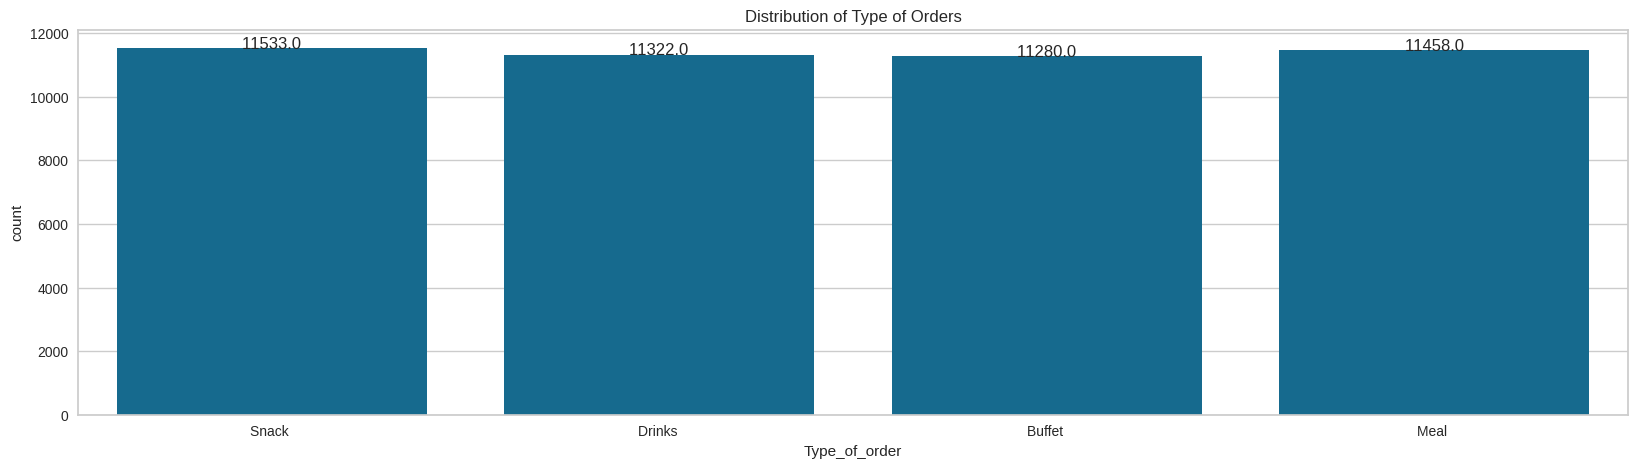

In [10]:
# Plotting charts
plt.figure(figsize=(20, 5))

# Bar chart for Type_of_order
ax = sns.countplot(x='Type_of_order', data=df)
plt.title('Distribution of Type of Orders')

# Add count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center")

plt.show()


Text(0.5, 1.0, 'Distribution of Type of Vehicles')

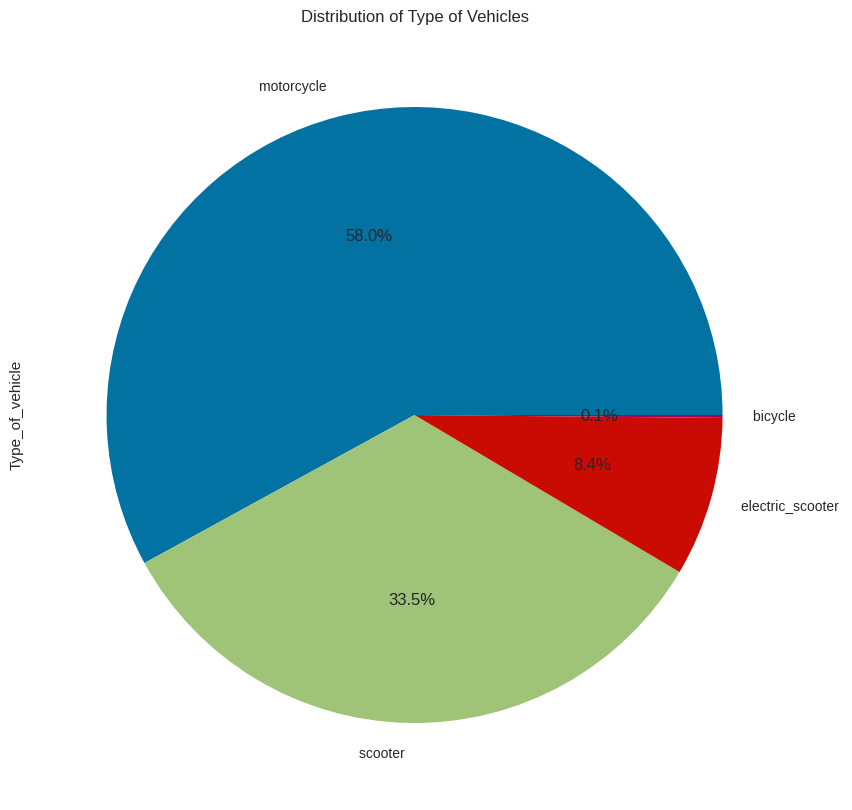

In [11]:
# Plotting charts
plt.figure(figsize=(100, 10))
# Pie chart for Type_of_vehicle
df['Type_of_vehicle'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Type of Vehicles')

Text(0.5, 1.0, 'Delivery Person Age vs Ratings')

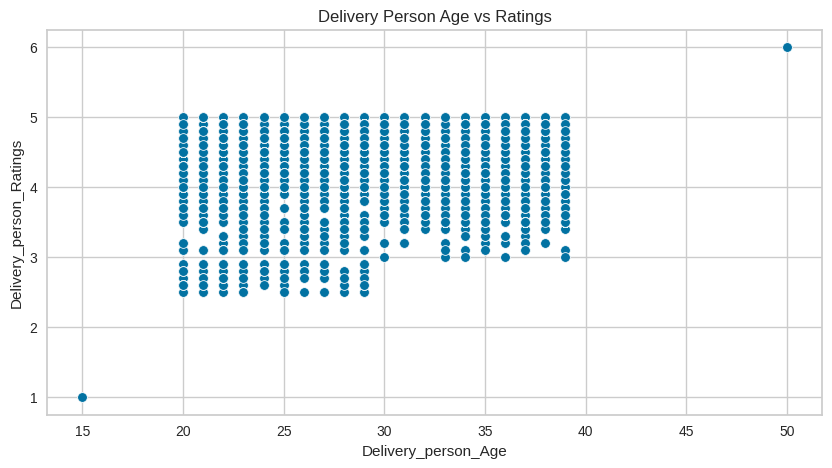

In [12]:
# Plotting charts
plt.figure(figsize=(10, 5))

# Scatter plot for Delivery_person_Age vs Delivery_person_Ratings
sns.scatterplot(x='Delivery_person_Age', y='Delivery_person_Ratings', data=df)
plt.title('Delivery Person Age vs Ratings')

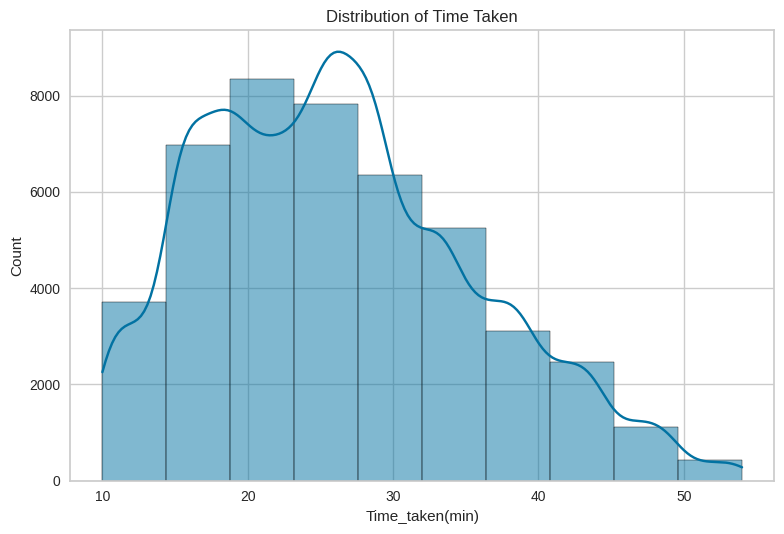

In [13]:
# Histogram for Time_taken(min)
sns.histplot(df['Time_taken(min)'], bins=10, kde=True)
plt.title('Distribution of Time Taken')

plt.tight_layout()
plt.show()

In [19]:

# Splitting data
X = np.array(df[["Delivery_person_Age", "Delivery_person_Ratings", "distance"]])
y = np.array(df[["Time_taken(min)"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Initialize the setup
reg_setup = setup(data=df, target='Time_taken(min)')

# Compare models
best_model = compare_models()

,Description,Value
0,Session id,3150
1,Target,Time_taken(min)
2,Target type,Regression
3,Original data shape,"(45593, 12)"
4,Transformed data shape,"(45593, 18)"
5,Transformed train set shape,"(31915, 18)"
6,Transformed test set shape,"(13678, 18)"
7,Numeric features,7
8,Categorical features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,6.9734,76.8245,8.7616,0.1292,0.3361,0.3128,2.5870
knn,K Neighbors Regressor,7.1701,80.8156,8.9892,0.0840,0.3396,0.3127,0.8370
en,Elastic Net,7.4345,84.8528,9.2111,0.0382,0.3535,0.3361,0.3710
xgboost,Extreme Gradient Boosting,7.4221,85.3774,9.2391,0.0324,0.3546,0.3353,0.9400
lightgbm,Light Gradient Boosting Machine,7.5146,87.1488,9.3350,0.0121,0.3571,0.3377,2.7310
dt,Decision Tree Regressor,7.4949,87.3453,9.3452,0.0100,0.3578,0.3377,0.6730
gbr,Gradient Boosting Regressor,7.5221,87.4563,9.3513,0.0087,0.3576,0.3380,5.3650
omp,Orthogonal Matching Pursuit,7.5685,87.5920,9.3575,0.0073,0.3591,0.3426,0.3350
et,Extra Trees Regressor,7.5726,87.8309,9.3713,0.0045,0.3602,0.3439,3.7640
rf,Random Forest Regressor,7.5485,87.9893,9.3797,0.0027,0.3585,0.3389,8.7240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [29]:

# Create AdaBoost Regressor model
ada_boost = AdaBoostRegressor(n_estimators=50, learning_rate=1, random_state=42)
ada_boost.fit(X_train, y_train)

y_pred = ada_boost.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 58.76900954057931
R-squared: 0.32971876760610874
Mean Absolute Error: 6.144489441015594


In [24]:
from xgboost import XGBRegressor


In [25]:
# Create XGBoost Regressor model
xgboost = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgboost.fit(X_train, y_train)

# Predictions
y_pred = xgboost.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 54.35829857162347
R-squared: 0.38002447816880935
Mean Absolute Error: 5.782657563679835


In [33]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", ada_boost.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 29
Ratings of Previous Deliveries: 2.9
Total Distance: 6
Predicted Delivery Time in Minutes =  [34.15377616]


In [ ]:
6